In [18]:
future_forecast = model.forecast(12)

future_dates = pd.date_range(
    start=weekly_sales.index[-1] + pd.DateOffset(weeks=1),
    periods=12,
    freq='W'
)

future_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_Sales': future_forecast
})

future_df.to_csv('forecast_output.csv', index=False)
future_df.head()

,Date,Forecasted_Sales
2012-04-13,2012-11-04,4.708647e+07
2012-04-20,2012-11-11,5.081487e+07
2012-04-27,2012-11-18,4.567461e+07
2012-05-04,2012-11-25,4.902457e+07
2012-05-11,2012-12-02,4.763774e+07


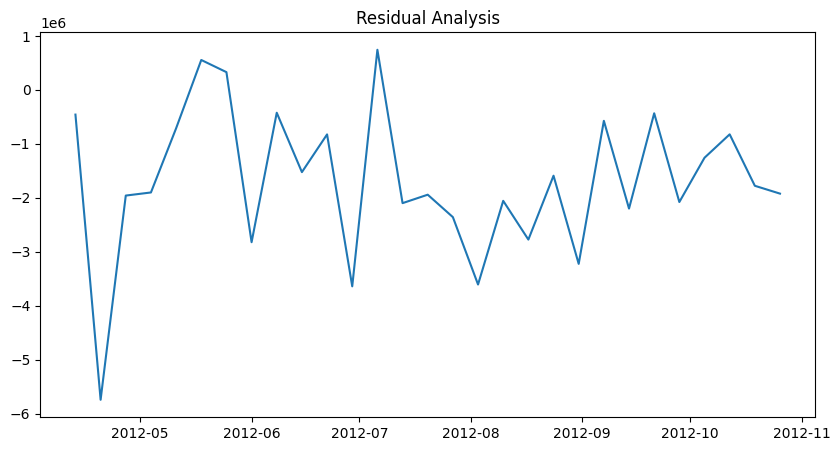

In [17]:
residuals = test['Weekly_Sales'] - forecast

plt.figure(figsize=(10,5))
plt.plot(residuals)
plt.title("Residual Analysis")
plt.show()

In [16]:
moving_avg_forecast = train['Weekly_Sales'].rolling(window=4).mean().iloc[-1]


In [15]:
weekly_sales['Year'] = weekly_sales.index.year
weekly_sales['Month'] = weekly_sales.index.month
weekly_sales['Week'] = weekly_sales.index.isocalendar().week


In [14]:
mae = mean_absolute_error(test['Weekly_Sales'], forecast)
mape = np.mean(np.abs((test['Weekly_Sales'] - forecast) / test['Weekly_Sales'])) * 100

print("MAE:", round(mae,2))
print("MAPE:", round(mape,2), "%")

MAE: 1804732.26
MAPE: 3.9 %


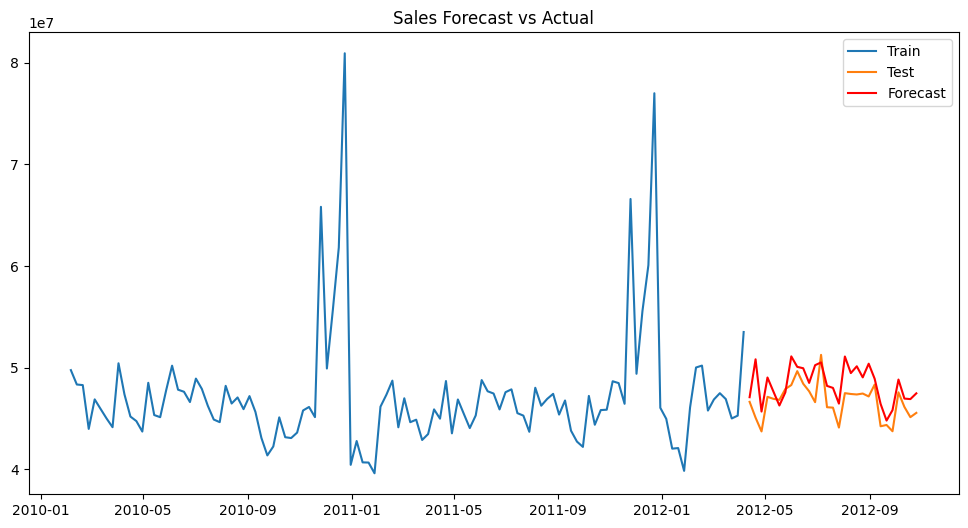

In [13]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index, test['Weekly_Sales'], label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Sales Forecast vs Actual')
plt.show()

In [12]:
model = ExponentialSmoothing(
    train['Weekly_Sales'],
    trend='add',
    seasonal='add',
    seasonal_periods=52
).fit()

forecast = model.forecast(len(test))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [11]:
split = int(len(weekly_sales) * 0.8)

train = weekly_sales.iloc[:split]
test = weekly_sales.iloc[split:]

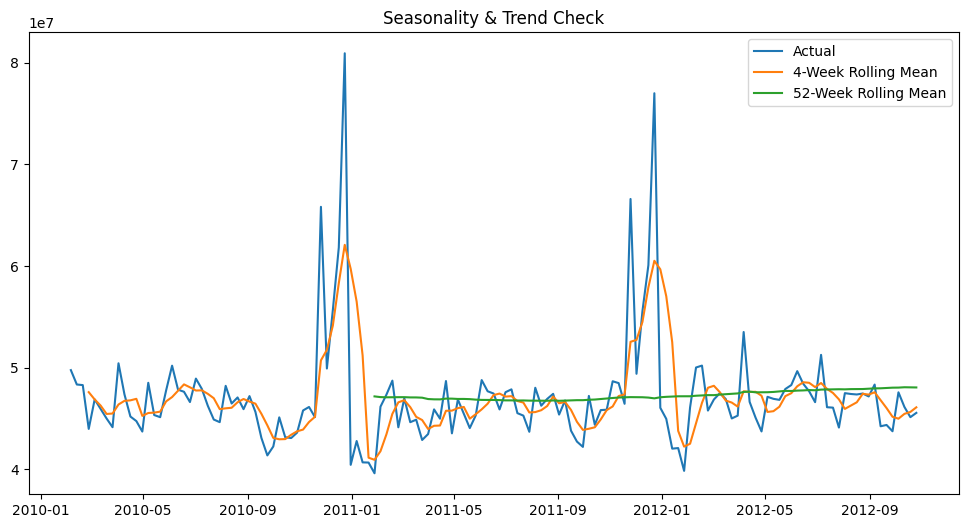

In [10]:
weekly_sales['Rolling_4'] = weekly_sales['Weekly_Sales'].rolling(window=4).mean()
weekly_sales['Rolling_52'] = weekly_sales['Weekly_Sales'].rolling(window=52).mean()

plt.figure(figsize=(12,6))
plt.plot(weekly_sales['Weekly_Sales'], label='Actual')
plt.plot(weekly_sales['Rolling_4'], label='4-Week Rolling Mean')
plt.plot(weekly_sales['Rolling_52'], label='52-Week Rolling Mean')
plt.legend()
plt.title('Seasonality & Trend Check')
plt.show()


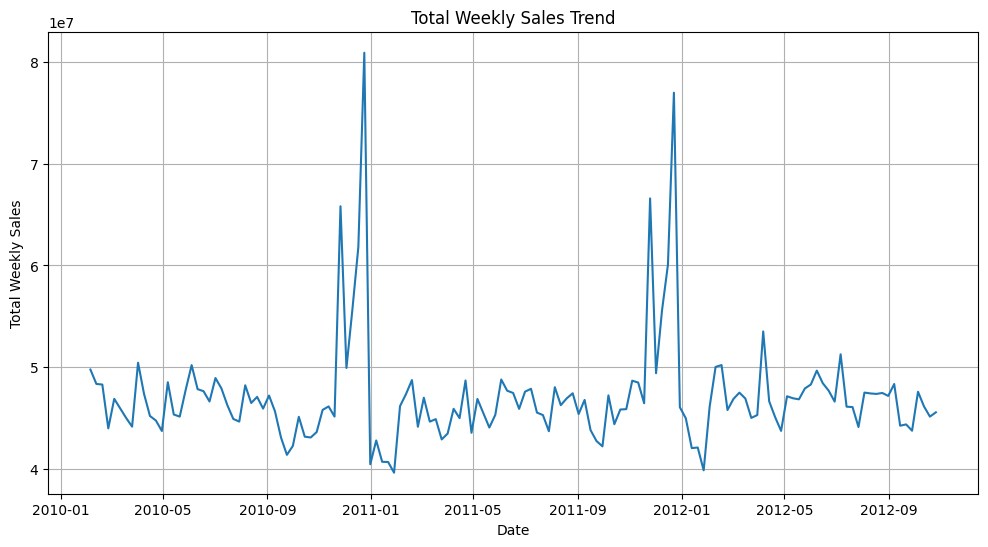

In [9]:
plt.figure(figsize=(12,6))
plt.plot(weekly_sales['Weekly_Sales'])
plt.title('Total Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid()
plt.show()

In [8]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
weekly_sales = weekly_sales.sort_values('Date')
weekly_sales.set_index('Date', inplace=True)

weekly_sales.head()

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


In [7]:
# Convert Date (format = DD-MM-YYYY)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort values
df = df.sort_values('Date')

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324


In [6]:
print("First 5 rows:")
display(df.head())

print("\nShape of dataset:")
print(df.shape)

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
display(df.describe(include='all'))

First 5 rows:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106



Shape of dataset:
(6435, 8)

Column Names:
['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

Data Types:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Missing Values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Summary Statistics:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


In [3]:
df = pd.read_csv('/content/Walmart Data Analysis and Forcasting.csv')

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Time series modeling
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Metrics
from sklearn.metrics import mean_absolute_error